In [1]:
import time, h5py, sys, numpy as np
import pandas as pd, glob
from pycbc import conversions

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [4]:
files = glob.glob('match*.csv')

In [5]:
result = None
for f in files:
    df = pd.read_csv(f, index_col=0)
    if result is None:
        result = df
    else:
        result = pd.concat([result,df])

In [6]:
result

injmass1  injmass2  injspin1z  injspin2z  lambda1  lambda2     mass1  \
0    4.902441  1.102324   0.169713  -0.304528      0.0      0.0  1.832049   
0    1.643300  1.681511  -0.099588   0.241814      0.0      0.0  1.008108   
0    1.969784  1.849057   0.457783  -0.284078      0.0      0.0  1.050310   
1    3.889465  1.139063   0.324147   0.557394      0.0      0.0  1.092494   
2    2.311061  1.694936  -0.834695   0.420699      0.0      0.0  1.362483   
..        ...       ...        ...        ...      ...      ...       ...   
495  2.349596  1.314238  -0.210453   0.380490      0.0      0.0  1.042625   
496  1.816680  1.540534  -0.170653  -0.695639      0.0      0.0  1.243910   
497  3.036490  1.513329   0.871993  -0.612928      0.0      0.0  1.858740   
498  4.797900  1.815814  -0.101461   0.545431      0.0      0.0  1.270684   
499  2.300585  1.760360   0.910571  -0.789421      0.0      0.0  1.788915   

        mass2    spin1z    spin2z  max_match  
0    2.672597 -0.023434 -0.346124   0.988703  
0    2.896582  0.000672  0.295261   0.979749  
0    3.749001 -0.046932  0.364955   0.990288  
1    4.100110 -0.046372  0.470626   0.992474  
2    2.947377  0.028796 -0.316794   0.990602  
..        ...       ...       ...        ...  
495  3.086374  0.010616  0.141295   0.982785  
496  2.288969  0.029827 -0.494465   0.984391  
497  2.422214  0.000515  0.696342   0.988733  
498  7.571958  0.039458  0.303407   0.994561  
499  2.261881  0.020956  0.328028   0.997579  

[1506 rows x 11 columns]

In [10]:
result.to_csv('combined_ff.csv',index=False)

In [7]:
mc = conversions.mchirp_from_mass1_mass2(result['injmass1'],result['injmass2']).values
chieff = conversions.chi_eff(result['injmass1'],result['injmass2'],
                            result['injspin1z'],result['injspin2z']).values
ff = result['max_match'].values

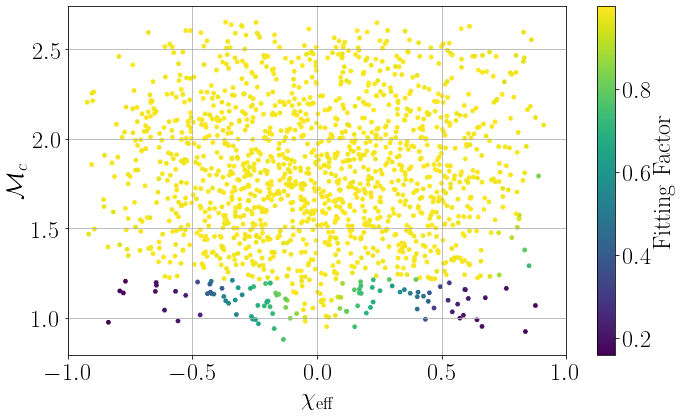

In [9]:
fig = plt.figure() 
ax = fig.add_subplot(111) 

cs = ax.scatter(chieff, mc, c=ff, alpha=1,marker='H',s=28,cmap='viridis', edgecolors='None')
cbar = fig.colorbar(cs,label=r'Fitting Factor')
'''
triang = tri.Triangulation(q, sim[:,2])
interpolator = tri.LinearTriInterpolator(triang, sim[:,3])

xi = np.linspace(1, 4,100)
yi = np.linspace(0, 0.2, 100)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

z2 = ndimage.gaussian_filter(zi, sigma=0.1, order=0)
bs = ax.contour(xi, yi, z2, levels=[0.80,0.97], linewidths=1, alpha=1,colors='black')
ax.clabel(bs,[bs.levels[0]],fmt = r'80 \%%')
ax.clabel(bs,[bs.levels[1]],fmt = r'97 \%%')


yticks = mtick.PercentFormatter(xmax=1) 
cbar.ax.yaxis.set_major_formatter(yticks) 
cbar.ax.set_ylim(np.min(sim[:,3]),1)
cbar.ax.yaxis.set_major_locator(plt.MaxNLocator(3))
'''
ax.set_xlabel('$\chi_\mathrm{eff}$')
ax.set_ylabel('$\mathcal{M}_c$')
ax.set_xlim(-1,1)
#ax.set_ylim(0,0.2)
#ax.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout() 

fig.savefig('ff.pdf')